# Assignment 4<br>


### Antoine Wang 260766084

In [1]:
# Define the path for the input images
# please change this part if directory is different
path = ''

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Section 1: Image Segmentation using K-means

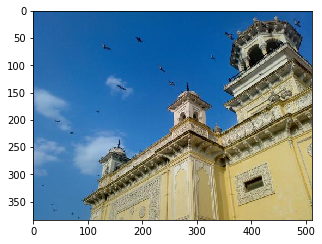

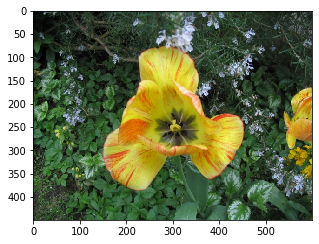

In [3]:
home_img = cv2.imread( path + 'home.jpg')
home_img  = cv2.cvtColor(home_img , cv2.COLOR_BGR2RGB)
flower_img = cv2.imread(path + 'flower.jpg')
flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(home_img)
plt.figure(figsize=(5,5))
plt.imshow(flower_img)

#### 1.1 using k = 2

In [4]:
def myKMean(img, k=2, iter_n = 10):
    
    # random initialization of mean center
    init_k = np.random.rand(k,3)*255
    
    img_list = []
    
    # set up plot
    fig=plt.figure(figsize=(20, 20))

    for i in range(10):
        
        # establish a bigger matrix having one more dimension for different Ks
        # difference.shape = (k(2-3), img_height, img_length, 3(RGB))
        difference = np.zeros(shape=(k,img.shape[0], img.shape[1], img.shape[2]))
        
        # substract initial mean values in init_K
        for j in range(0,k):
            for x in range(0, img.shape[0]):
                for y in range(0, img.shape[1]):
                    difference[j,x,y,:] = img[x,y,:] - init_k[j, :]
                        
        # Calculate norm on RGB
        # RGB is on the fourth axis indicate by aixs =3
        difference = np.linalg.norm(difference, axis=3)
  
        # Among 3 cluster center, find the cluster gives smallest norm
        # label: shape equals the ima dimension, containing which cluster each pixel assign to
        label = np.argmin(difference, axis=0)
          
       

        # calculate new cluster centers.
        new_ks = np.zeros(shape=(k,3))
        for j in range(0,k):
            correspond_label = img[label == j]
            # choose all pixel assigned to a label and update that label
            new_ks[j] = np.mean(correspond_label, axis=0)
        init_k = new_ks
        
        # convert for plotting
        label = label.astype(np.uint8)
        img_list.append(label)
    
        # ploting
        plt.subplot(4,3,i+1), plt.imshow(img_list[i])
        plt.title("Iteration " +  str(i+1))
    
    plt.show()

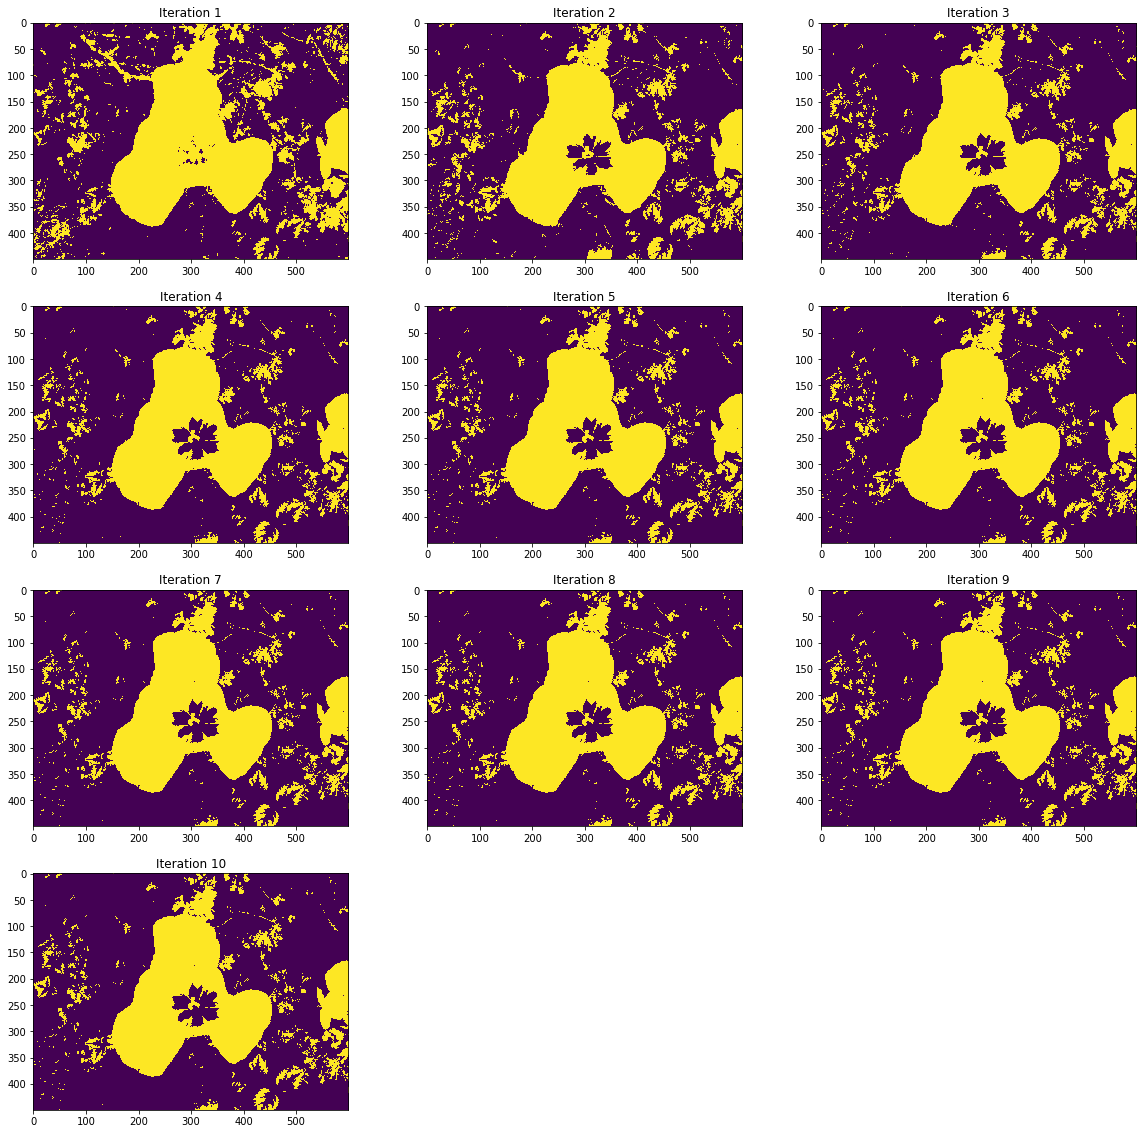

In [5]:
myKMean(flower_img, k=2)

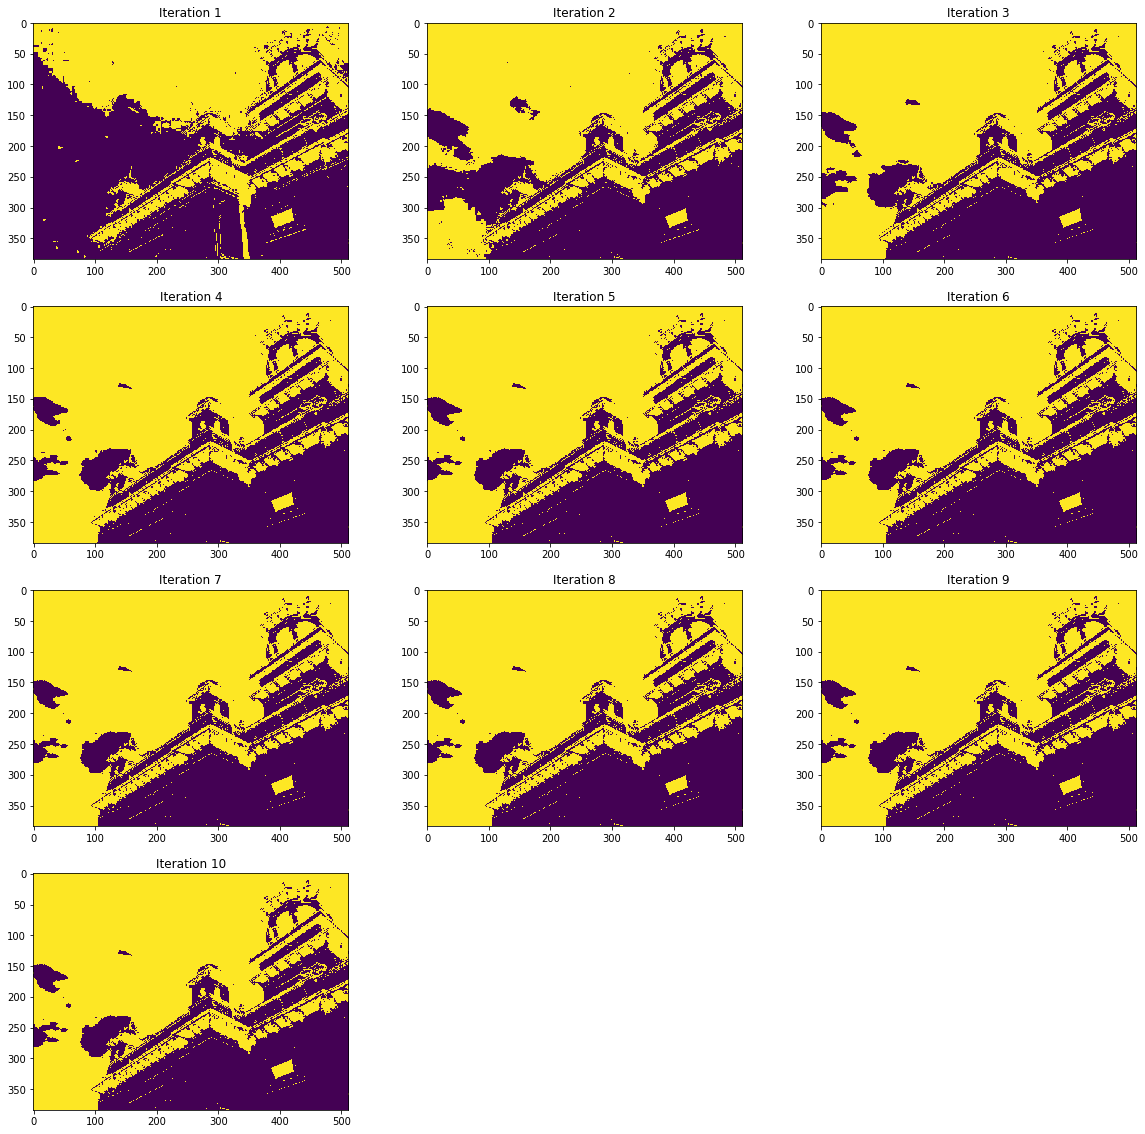

In [6]:
myKMean(home_img, k=2)

#### 1.2 using k = 3

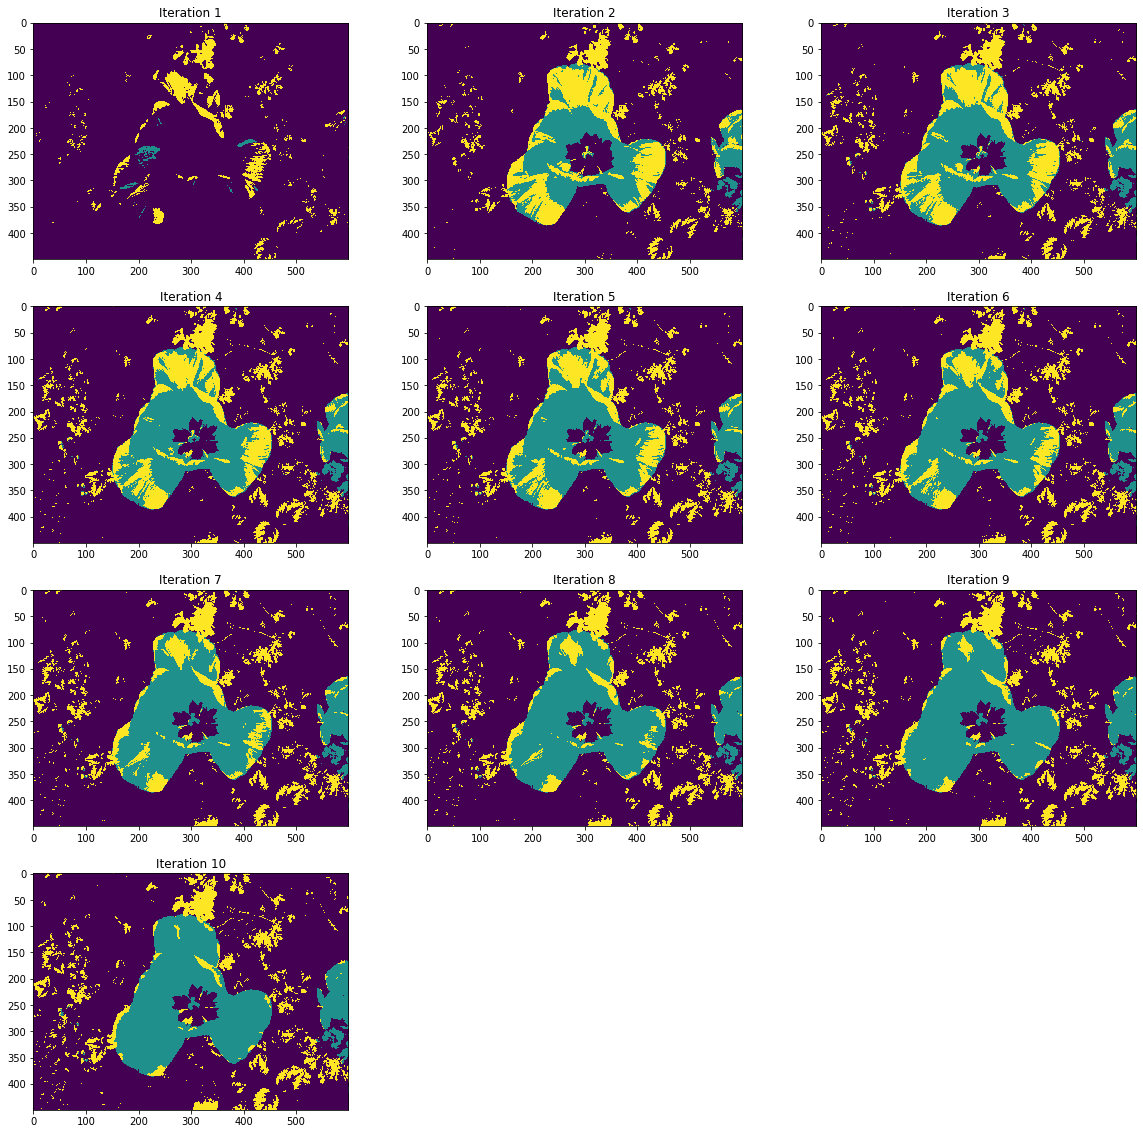

In [7]:
myKMean(flower_img, k=3)

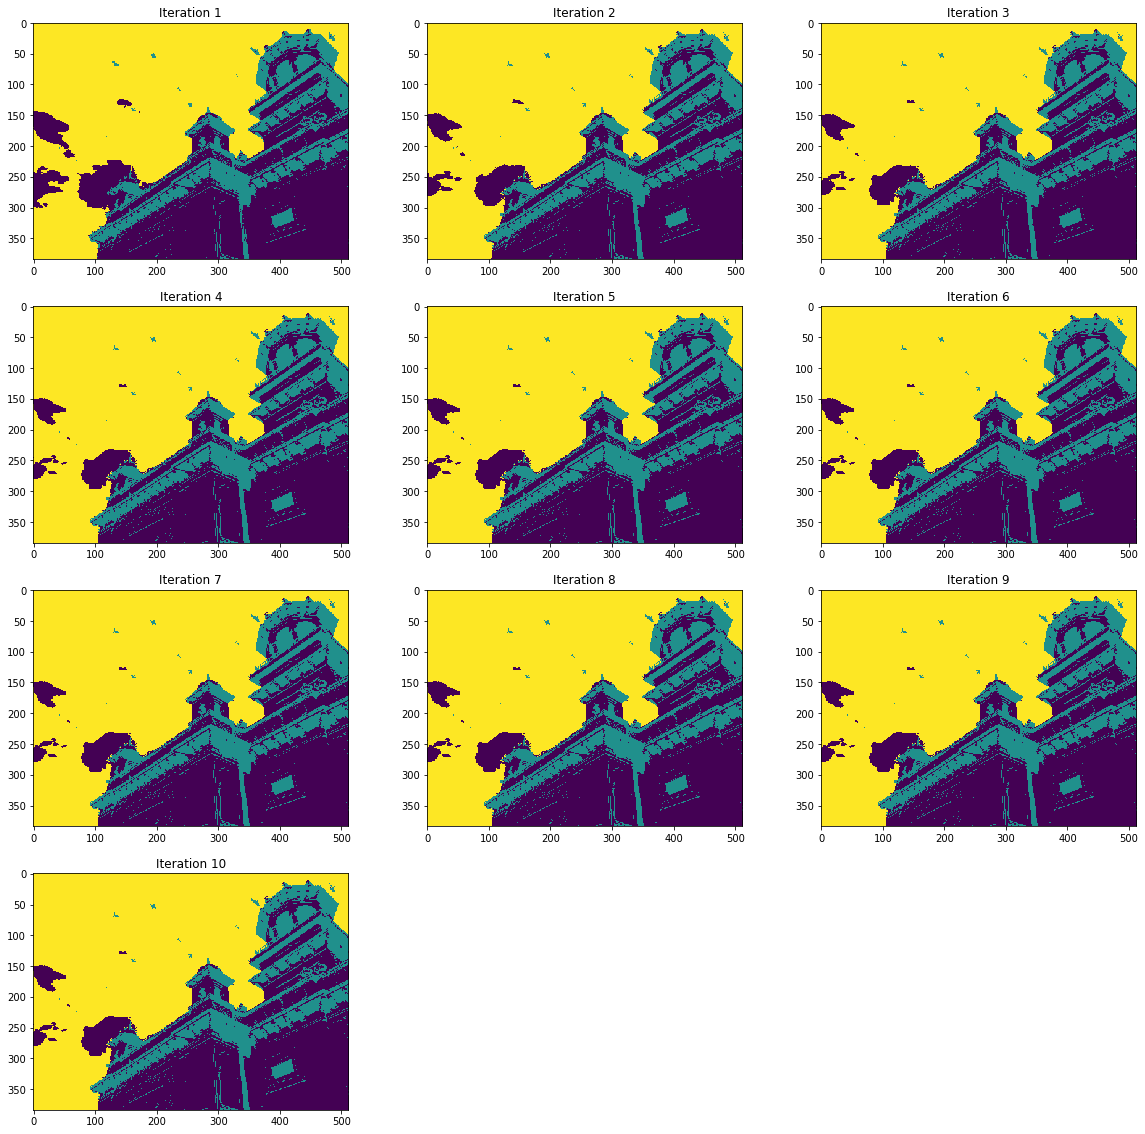

In [9]:
myKMean(home_img, k=3)

### Section 2: Disparity

#### 1. Extract a 5 × 5 window centered at each pixel-location (i, j)L in the left image. 

In [10]:
def get_ref_window(img, x, y, size = 5):
    radius = int(size/2)
    return img[y-radius : y + radius + 1 , x-radius : x+radius+1]

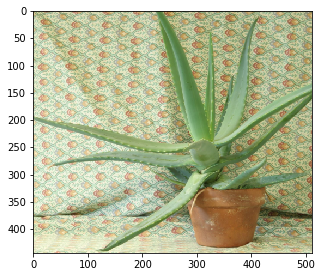

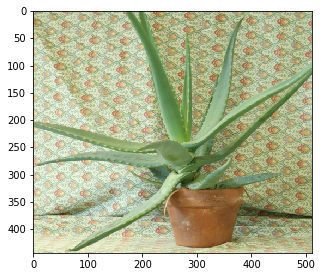

In [11]:
leftimg = cv2.imread( path + 'aloeL.jpg')
leftimg  = cv2.cvtColor(leftimg , cv2.COLOR_BGR2RGB)
rightimg = cv2.imread(path + 'aloeR.jpg')
rightimg = cv2.cvtColor(rightimg, cv2.COLOR_BGR2RGB)

# resize image
resizedDimension = (int(leftimg.shape[1] *0.4), int(leftimg.shape[0] * 0.4))
LImg = cv2.resize(leftimg, resizedDimension, interpolation = cv2.INTER_AREA)
RImg = cv2.resize(rightimg,resizedDimension, interpolation = cv2.INTER_AREA)


plt.figure(figsize=(5,5))
plt.imshow(LImg)
plt.figure(figsize=(5,5))
plt.imshow(RImg)

#### 2. For each reference window in the left image do the following.
##### (a) On the right scanline, create a search region bounded by pixel-locations (i, j−47)R and (i, j)R.
##### (b) For few boarder pixel-locations either the reference window or the search region lie outside the boundary of the image. Set disparity D(i, j) = 48 for these pixel-locations. 
##### (c) Compute sum-of-square-difference(SSD) between the windows in the search region and the reference window.
##### (d) Find a location (i0, j0 )R with minimum SSD and compute disparityD(i, j) = jL − j0 R. 

In [12]:
def get_ssd(inW, refW):
    # both window should be 5*5*3
    difference = inW - refW
    #difference = np.linalg.norm(difference, axis=2)
    
    return(np.sum(difference * difference))
    

In [13]:
# since horizontal camera, the epipolar lines are parallel horizontal lines
disparity = np.zeros((LImg.shape[0], LImg.shape[1]))

print(disparity.shape)
print(LImg.shape)
print(leftimg.shape)

ref = get_ref_window(LImg, 100, 100)
inw = get_ref_window(RImg, 100, 100)
print(get_ssd(inw,ref ))
for x in range(LImg.shape[1]):
    for y in range(LImg.shape[0]):
        
        if(x<2 or (x+2)>= LImg.shape[1] or y<2 or (y+2)>= LImg.shape[0]):
            disparity[y,x] = 48
        elif(x< (48+2)):
            # need to add the size at the end of search region
            disparity[y,x] = 48
        else:
            ssd = np.zeros(48)
            
            ref = get_ref_window(LImg, x, y)
            for i in range(48):
                inw = get_ref_window(RImg, x-i, y)
                ssd[i] = get_ssd(inw, ref)
            # find the smallest difference by ssd, and assign the distance to disparity matrix
            disparity[y,x] = np.argmin(ssd, axis=0)
            


(444, 512)
(444, 512, 3)
(1110, 1282, 3)
7639


#### 3. Display the final disparity map D with the cmap argument of plt.imshow set to `gray r'. 

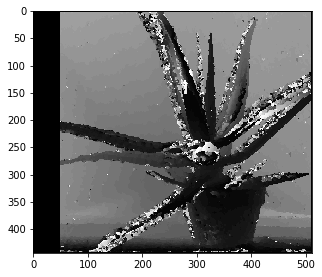

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(disparity, cmap = "gray_r")

### Section 3: Optical Flow

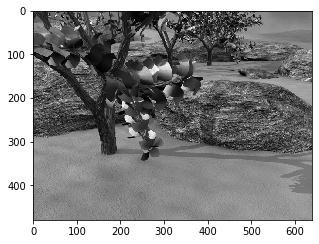

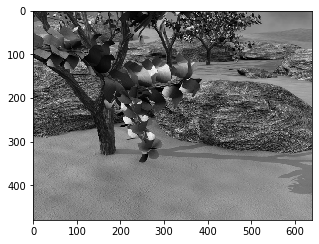

In [15]:
# read ground truth
gt = np.load(path + 'flow10.npz')['flow']

f10 = cv2.imread( path + 'frame10.png')
f10  = cv2.cvtColor(f10 ,  cv2.COLOR_BGR2GRAY)
f11 = cv2.imread(path + 'frame11.png')
f11 = cv2.cvtColor(f11,  cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(5,5))
plt.imshow(f10, cmap ="gray" )
plt.figure(figsize=(5,5))
plt.imshow(f11,  cmap ="gray")

#### 1.Use calcOpticalFlowFarneback from OpenCV to compute optical flow

In [16]:
# A function to help draw optical flow with flow lines
def draw_flow(img, flow, step=16):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis

In [17]:
def find_flow(win_size, img1 = f10, img2 = f11):
    flow = cv2.calcOpticalFlowFarneback(prev=img1, 
                                        next=img2, 
                                        flow=None,
                                        pyr_scale=0.5, 
                                        levels=3, 
                                        winsize=win_size,
                                        iterations=3, 
                                        poly_n=5, 
                                        poly_sigma=1.2, 
                                        flags=0)
    # draw flow
    vis = draw_flow(f10, flow, step=12)
    return vis, flow


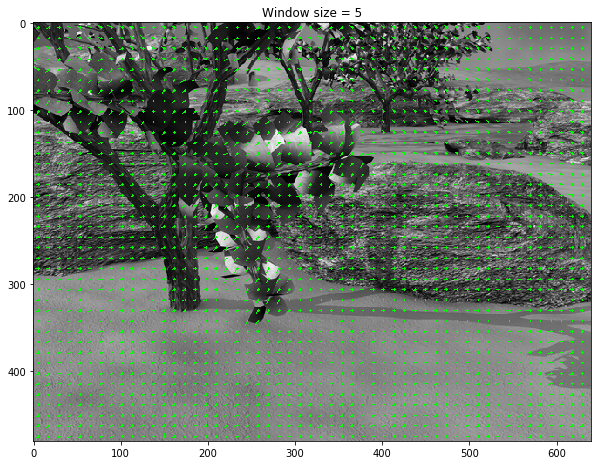

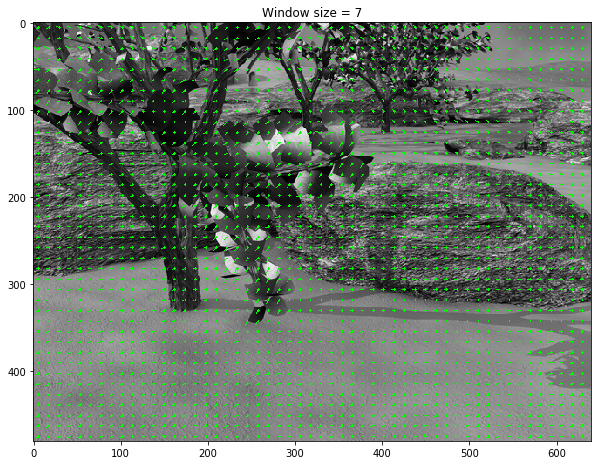

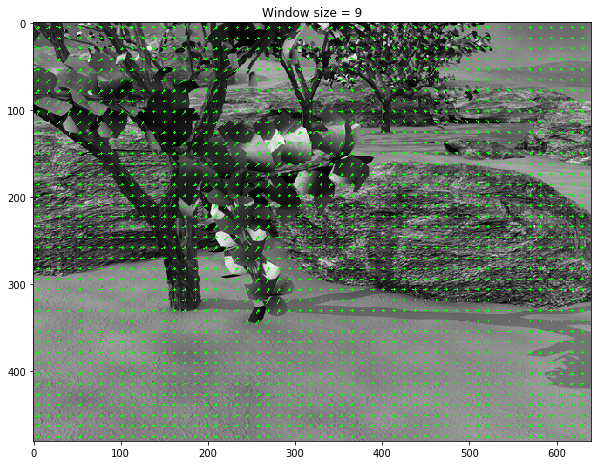

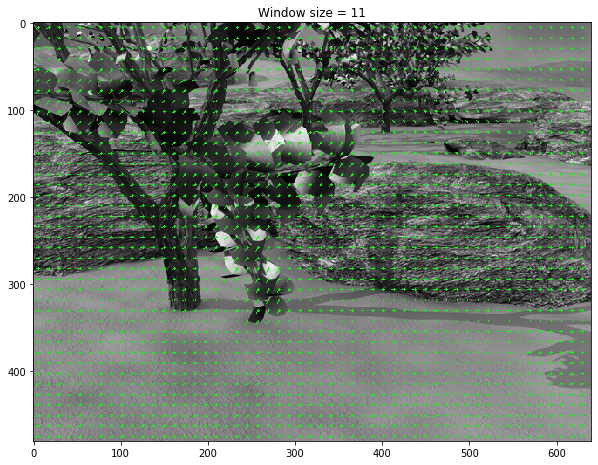

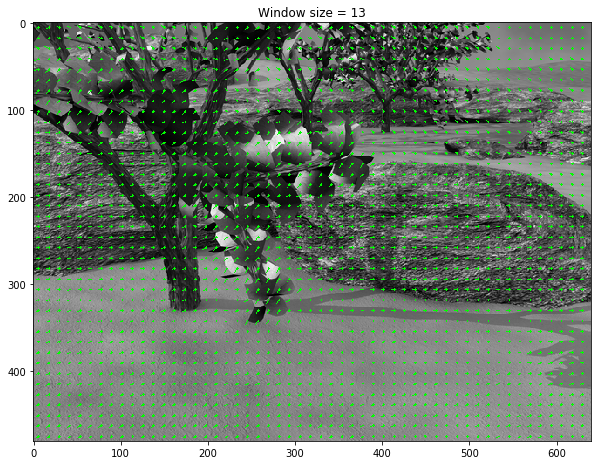

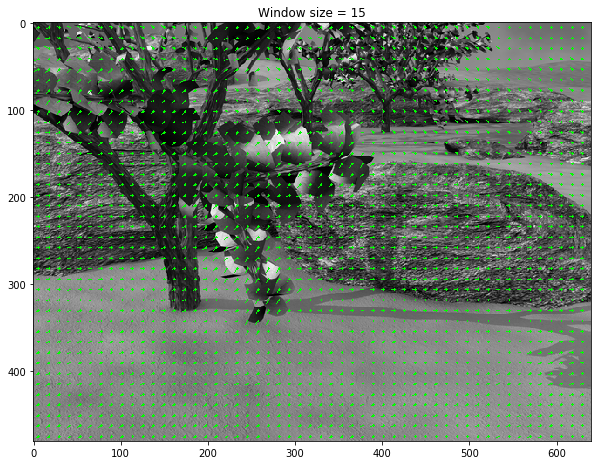

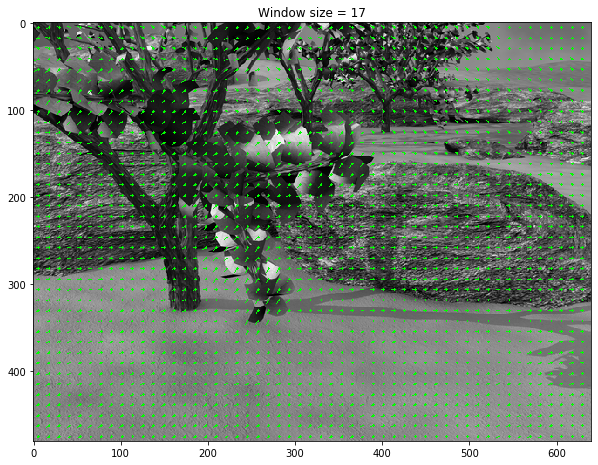

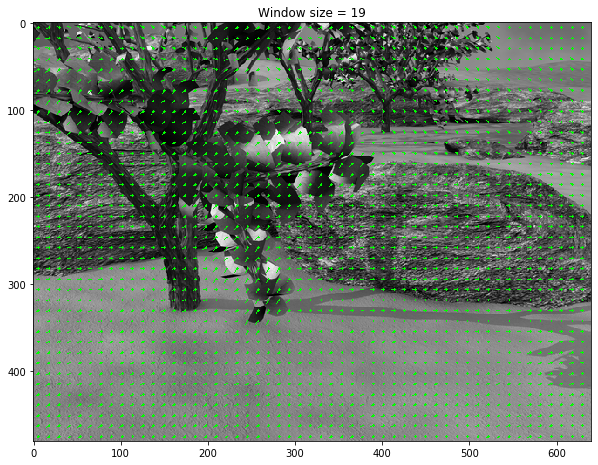

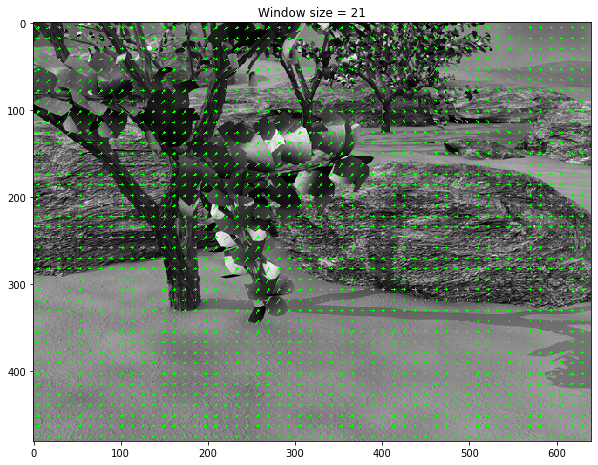

In [18]:
win_size = 5
flow_list = []
while win_size<=21:
    show, flow = find_flow(win_size)
    plt.figure(figsize=(10,10))
    plt.title("Window size = " + str(win_size))
    plt.imshow(show)
    
    flow_list.append(flow)
    
    win_size = win_size + 2

#### 2. For each setting of winsize, measure mean squared error(MSE) between estimated optical flow and the ground truth optical flow.

In [19]:
# check if the ground truth is in the same size
print(gt.shape)
print(flow_list[0].shape)

def get_mse(flow_t, gt):
    number_of_pixel = flow_t.shape[0] * flow_t.shape[1]
    dif = flow_t - gt
    return (np.sum(dif*dif))/number_of_pixel 

(480, 640, 2)
(480, 640, 2)


[2.1954420169682467, 1.6338711002113013, 1.4077944841372214, 1.274809750034968, 1.1967003443675865, 1.1483524471938535, 1.1132246321843047, 1.0829486198120313, 1.0564192909698304]


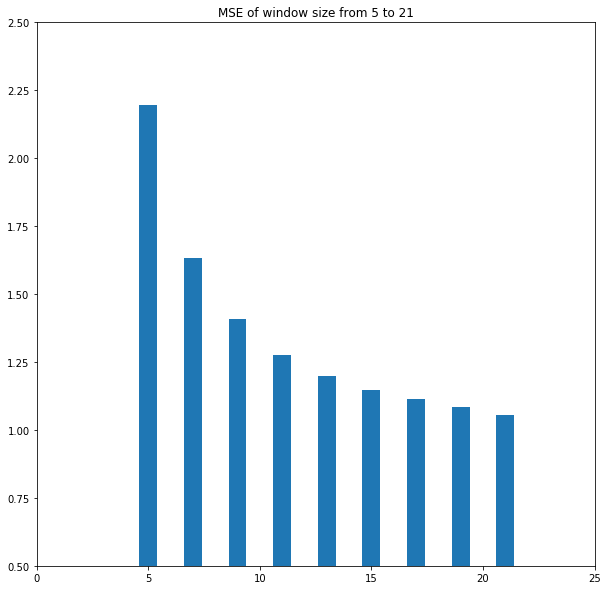

In [22]:
mse_list = []
# calculate mse and add the result to a list
for flow_t in flow_list:
    mse_list.append(get_mse(flow_t, gt))
    
    
mse_array_for_plot = np.zeros(25)
win_size = 5
list_index = 0
while win_size<=21:
    # convert mse list to an array to plot
    mse_array_for_plot[win_size] = mse_list[list_index]
    win_size = win_size + 2
    list_index = list_index + 1
    
print(mse_list)
plt.figure(figsize=(10,10))
plt.bar(np.arange(0,25), mse_array_for_plot )
plt.title("MSE of window size from 5 to 21")
plt.xlim([0,25]) # set x-axis limit
plt.ylim([0.5,2.5]) # set y-axis limit
plt.show()

#### 3. Do you observe any trend in the plot above? Does the error increase or decrease with increasing window-size? Explain the effect of window-size on the prediction error.

From the plot above, the error decrease with the increasing window size. The error is decreasing exponentially with larger window size.